# Librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import re
import scipy.stats
import matplotlib.pyplot as plt
import os
import seaborn as sns



In [2]:
import warnings
warnings.filterwarnings('ignore')

# Exercise 1 (1 point)


Read file IMDb_All_Genres_etf_clean1.csv
It contains information of more than 5000 films in IMDB
- 'Movie_Title' : Consist of 5000+ Movie Titles (5000+ Unique Values)
- 'Year' : Ranging from 1920s to 2022 (99 Unique Values)
- 'Director' : Names the Director (2000+ Unique Values)
- 'Actors' : Names the Actors (5000+ Unique & Multiple Values)
- 'Rating' : Titles rated for 10 by 25k+ Voters (74+ Unique Values)
- 'main_genre' : Main Genre of the Title (13+ Unique Values)
- 'side_genre' : Side / Multiple Genre of the Movie (144+ Unique & Multiple Values)
- 'Runtime(Mins)' : Total duration of the movie in Minutes (156+ Unique Values)
- 'Censor' : Censorship of the Movie (25+ Unique Values)
- 'Total_Gross' : Total Box-Office Collection of the Movie (3500+ Unique Values)


In [3]:
df = pd.read_csv("IMDb_All_Genres_etf_clean1.csv")
display(df.head())


,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"


# Exercise 2 (1 point)

- Change the Total_Gross to number (numer of $M) 
- Use the function re.sub(pattern, repl, string, count=0, flags=0), for regular expressions
- Total_Gross = float(re.sub("\$", "", Total_Gross_old)) # note, you should also eliminate the final M
- Remove rows with  'Gross Unkown' 


In [4]:
df['Total_Gross'].unique()
df2 = df[df['Total_Gross'] != 'Gross Unkown'].reset_index(drop= True)
df2['New_total_gross'] = df2['Total_Gross'].apply(lambda x: re.sub("\$", "", x)).apply(lambda x: re.sub("M", "", x)).apply(lambda x: float(x))
display(df2.head())


,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre,New_total_gross
0,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama",534.86
1,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama",377.85
2,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi",292.58
3,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama",342.55
4,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",8.8,178,U,$315.54M,Action,"Adventure, Drama",315.54


# Exercise 3 (2 point)

Divide films by decade, do a barplot with the number of times of the most 5 popular genres ('main_genre') 

In [19]:
def get_decade(year):
    return (year // 10) * 10
df2['ones'] = 1
df2['decade'] = df2['Year'].apply(get_decade)



In [ ]:
df_agr = df2.groupby(['decade', 'main_genre'], as_index=False)['ones'].sum()
df_agr = df_agr.rename(columns={'ones': 'count'})
df_agr = df_agr.sort_values(by=['decade', 'count'], ascending=False).reset_index(drop=True)

df_mg = pd.DataFrame()
for decade in df_agr['decade'].unique():
    aux = df_agr[df_agr['decade'] == decade][:3]
    # concat expects an iterable of DataFrames, so pass a list
    df_mg = pd.concat([df_mg, aux], ignore_index=True)
# print the aggregated result once


    decade main_genre  count
0     2020     Action     30
1     2020  Animation      6
2     2020  Adventure      4
3     2010     Action    521
4     2010     Comedy    350
5     2010      Drama    292
6     2000     Comedy    416
7     2000     Action    396
8     2000      Drama    249
9     1990     Comedy    246
10    1990     Action    217
11    1990      Drama    138
12    1980     Comedy    129
13    1980     Action    102
14    1980      Drama     53
15    1970     Action     38
16    1970      Drama     38
17    1970     Comedy     30
18    1960      Drama     19
19    1960     Action     16
20    1960     Comedy     14
21    1950      Drama     16
22    1950      Crime     11
23    1950     Comedy      7
24    1940      Drama     11
25    1940  Animation      4
26    1940     Comedy      4
27    1930     Comedy      6
28    1930      Drama      5
29    1930     Action      1
30    1920      Drama      3
31    1920     Action      2
32    1920  Adventure      1


<Axes: xlabel='decade', ylabel='count'>

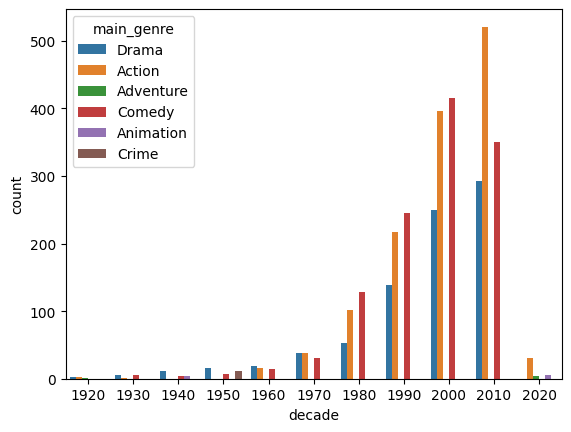

In [50]:
sns.barplot(df_mg, x = 'decade', y= 'count' , hue= 'main_genre')

# Exercise 4 (1 point)

- Draw the mean income by main_genre along decades
- For this plot, only retain genres that appear more than 200 times in total
- Remember that sns.relplot(kind = "line") uses the mean value


In [78]:
df_n = df2[['main_genre', 'decade', 'ones']]
mg = df_n.groupby('main_genre')['decade'].count().sort_values(ascending=False)
mg = list(mg[mg > 200].index)
df_n = df_n[df_n['main_genre'].isin(mg)]
df_n.groupby(['decade'], as_index=False)[['main_genre', 'ones']].mean()

TypeError: agg function failed [how->mean,dtype->object]

# Exercise 5 (3 point)

- Determine if any main genre is "better" than the rest.? (Hint: compare one against the rest)<br>
<br>
Compare the 'Rating', 'Total_Gross' and 'Runtime(Mins)'. You can use either:

-   t-test [scipy.stats.ttest_ind]
-   wilcoxon-test [scipy.stats.ranksums]
-   anova [scipy.stats.f_oneway]
-   krustal-wallis [scipy.stats.kruskal]

To answer this question, reason your answer. For this part of the code reduce the data to from 1980 to 2019

In [92]:
df3 = df2[df2['Year'] >= 1980]
print(len(df3))
df3 = df3[df3['Year'] <= 2019]



4376


In [96]:
scipy.stats.shapiro(df3['New_total_gross'])

ShapiroResult(statistic=0.6661387085914612, pvalue=0.0)

# Exercise 6 (2 point)

Construct a count matrix X for the different actors in the films <br>
Consider using this code: <br>




In [97]:
Actors = {i for i in re.split(', ', df.Actors[0])}

for i in df.Actors:

    for j in re.split(', ', i):

        Actors.add(j)

Actors = np.sort([i for i in Actors])

print(Actors)

Actors = np.sort([i for i in Actors])

print(len(Actors))

[' Star:Robert Redford' "'Weird Al' Yankovic" '50 Cent' ... 'Özlem Tekin'
 'Ørjan Gamst' 'Øyvind B. Fabricius Holm']
8431


In [116]:
Actors = {i for i in re.split(', ', df.Actors[0])}
Actors

{'Achyuth Kumar', 'Kishore Kumar G.', 'Rishab Shetty', 'Sapthami Gowda'}

Then:
- Delete variables with total frequency less than 10
- Apply PCA and plot the first 2 components
- Plot the PCA twice, one coloring by total_gross and other by main_genre.
- Do actors cluster revenue and by genre?

You can use from sklearn.decomposition import PCA

In [113]:
uni_ac = np.unique(Actors)
len(uni_ac), len(Actors)

(8431, 8431)